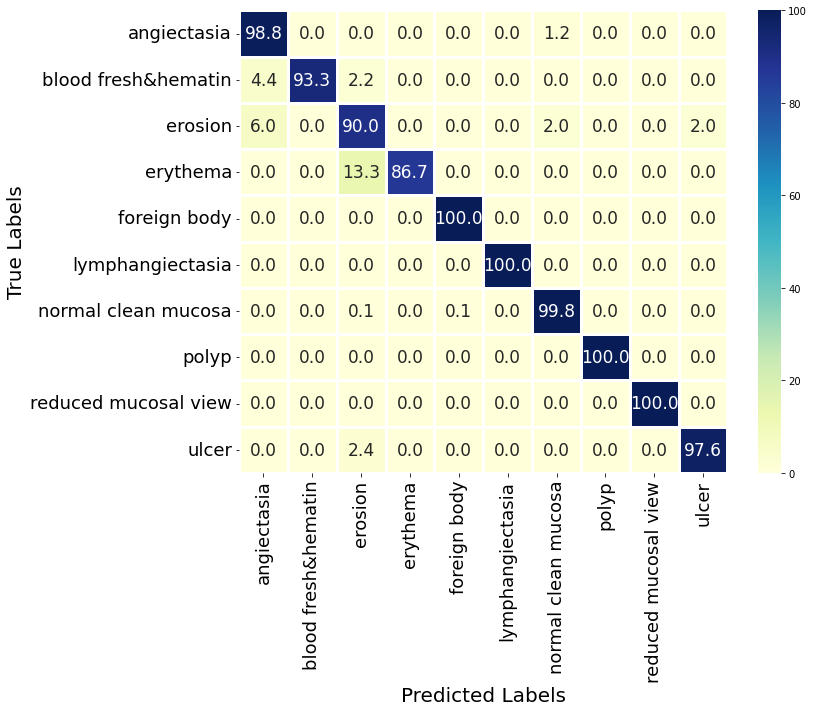

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cm_normalized(dataset):
    if dataset == "Kvasir-Capsule":
        num_classes = 10
        confusion = [[85, 2, 3, 0, 0, 0, 0, 0, 0, 0],
                     [0, 42, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 45, 2, 0, 0, 2, 0, 0, 2],
                     [0, 0, 0, 13, 0, 0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 77, 0, 2, 0, 0, 0],
                     [0, 0, 0, 0, 0, 59, 1, 0, 0, 0],
                     [1, 0, 1, 0, 0, 0, 3426, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 290, 0],
                     [0, 0, 1, 0, 0, 0, 1, 0, 0, 83]]
        classes = ["angiectasia", "blood fresh&hematin", "erosion", "erythema", "foreign body", "lymphangiectasia",
                   "normal clean mucosa", "polyp", "reduced mucosal view", "ulcer"]
    elif dataset == "CAD-CAP":
        num_classes = 3
        confusion = [[60, 1, 0],
                     [0, 59, 0],
                     [2, 0, 61]]
        classes = ["inflammatory", "normal", "vascular lesions"]
    elif dataset == "mixed KID":
        num_classes = 3
        confusion = [[151, 6, 6],
                     [11, 256, 8],
                     [4, 3, 167]]
        classes = ["inflammatory", "normal", "vascular lesions"]
    elif dataset == "TDMLF":
        num_classes = 10
        confusion = [[113, 0, 2, 7, 0, 0, 1, 0, 0, 1],
                    [1, 59, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 54, 0, 0, 0, 1, 0, 0, 9],
                    [3, 0, 0, 15, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 67, 0, 1, 0, 4, 0],
                    [0, 0, 2, 0, 0, 70, 2, 0, 0, 0],
                    [2, 1, 6, 3, 6, 0, 676, 0, 11, 1],
                    [0, 0, 0, 0, 0, 0, 1, 9, 0, 0],
                    [0, 0, 0, 0, 1, 0, 4, 0, 273, 0],
                    [1, 0, 8, 0, 0, 0, 1, 0, 0, 96]]
        classes = ["angiectasia", "blood fresh&hematin", "erosion", "erythema", "foreign body", "lymphangiectasia",
                   "normal clean mucosa", "polyp", "reduced mucosal view", "ulcer"]
    elif dataset == "MRC-Net":
        num_classes = 3
        confusion = [[94.33, 0.00, 5.67],
                    [0.00, 99.83, 0.17],
                    [9.83, 0.00, 90.17]]
        classes = ["inflammatory", "normal", "vascular lesions"]
    elif dataset == "ResNeXt-50":
        num_classes = 3
        confusion = [[136,   6,   7,],
                     [ 17, 253,   8,],
                     [ 13,   6, 166,]]
        
        classes = ["inflammatory", "normal", "vascular lesions"]

    # 转置混淆矩阵
    if dataset in ["Kvasir-Capsule", "CAD-CAP", "mixed KID", "ResNeXt-50"]:
        confusion_transposed = np.array(confusion, dtype=float).T
    else:
        confusion_transposed = np.array(confusion, dtype=float)
    # 归一化混淆矩阵并转换为百分比
    confusion_normalized = confusion_transposed / confusion_transposed.sum(axis=1, keepdims=True) * 100

    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_normalized, cmap="YlGnBu", annot=True, fmt=".1f", annot_kws={"fontsize": 17 }, linewidths=3.0) #15

    # 设置 x 轴和 y 轴的刻度标签为类别名称
    plt.xticks(np.arange(num_classes) + 0.5, classes, fontsize=18, rotation=90)
    plt.yticks(np.arange(num_classes) + 0.5, classes, fontsize=18, rotation=0)
    plt.xlabel("Predicted Labels", fontsize=20)
    plt.ylabel("True Labels", fontsize=20)
    # plt.title(f"Normalized Confusion Matrix for {dataset} Dataset", fontsize=15)

    # 调整布局，避免刻度标签被截断
    plt.tight_layout()

    # 保存图片到本地文件夹，设置 dpi 为 600
    plt.savefig(f"./figures/{dataset}_Normalized_CM.png", dpi=600)

    # 显示图像
    plt.show()

if __name__ == "__main__":
    dataset_list = ["Kvasir-Capsule", "CAD-CAP", "mixed KID", "TDMLF", "MRC-Net", "ResNeXt-50"]
    dataset_ID = 0
    plot_cm_normalized(dataset=dataset_list[dataset_ID])
